# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | First Name | Last Name | Signature | Hours | Contribution |
| Member 2: | First Name | Last Name | Signature | Hours | Contribution |
| Member 3: | First Name | Last Name | Signature | Hours | Contribution |
| Member 4: | First Name | Last Name | Signature | Hours | Contribution |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [ ]:
# some library imports
import pandas as pd

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [ ]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
# cv_set =

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
# test_set1 =

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
# test_set2 =

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [ ]:
# TODO: Display first two rows of cv_set
# (1 mark)

In [ ]:
# TODO: Load the info method of cv_set
# (1 mark)

In [ ]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
#print(f"'cv_set' has {???} rows and {???} columns")
#print(f"'test_set1' has {???} rows and {???} columns")
#print(f"'test_set2' has {???} rows and {???} columns")

In [ ]:
# TODO: Display all columns in cv_set
# (1 mark)

In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [ ]:
# TODO - Load target vector into y
# (1 mark)
# y =

From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [ ]:
# TODO - Load all features from cv_set to X
# (2 marks)
# X =
X.head(2)

___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [ ]:
# TODO - Perform test/train split
# (1 mark)
# X_train, X_test, y_train, y_test =

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [ ]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
# pipe =

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [ ]:
# TODO - Setup grid set
# (4 marks)

# param_grid =

In [ ]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search
# (2 marks)

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

In [ ]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1.
2.  

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
# y1 =
# X1 =
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)

#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1.
1.

___

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
file1 = '/content/drive/My Drive/Engg680_2024_Fall_Lab04/2020-03-14-16-45-35.csv'
file2 = '/content/drive/My Drive/Engg680_2024_Fall_Lab04/UrbanNav-HK_TST-20210517_sensors.csv'
file3 = '/content/drive/My Drive/Engg680_2024_Fall_Lab04/UrbanNav-HK_Whampoa-20210521_sensors.csv'

In [13]:
import pandas as pd
import os

# File paths
file1 = '/content/drive/My Drive/Engg680_2024_Fall_Lab04/Lab assignment 4/2020-03-14-16-45-35.csv'
file2 = '/content/drive/My Drive/Engg680_2024_Fall_Lab04/Lab assignment 4/UrbanNav-HK_TST-20210517_sensors.csv'
file3 = '/content/drive/My Drive/Engg680_2024_Fall_Lab04/Lab assignment 4/UrbanNav-HK_Whampoa-20210521_sensors.csv'

# Check file existence before loading
for file in [file1, file2, file3]:
    if os.path.exists(file):
        print(f"Found: {file}")
    else:
        print(f"Missing: {file}")

# Attempt to load the files
try:
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    df3 = pd.read_csv(file3)
    print("Files loaded successfully!")
except FileNotFoundError as e:
    print(e)

Found: /content/drive/My Drive/Engg680_2024_Fall_Lab04/Lab assignment 4/2020-03-14-16-45-35.csv
Found: /content/drive/My Drive/Engg680_2024_Fall_Lab04/Lab assignment 4/UrbanNav-HK_TST-20210517_sensors.csv
Found: /content/drive/My Drive/Engg680_2024_Fall_Lab04/Lab assignment 4/UrbanNav-HK_Whampoa-20210521_sensors.csv
Files loaded successfully!


     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.046400  0.305907  9.791451 -0.002184  0.001311 -0.001901  9.800683   
1 -0.050073  0.311947  9.785619 -0.003369  0.001898 -0.002051  9.797741   
2 -0.045121  0.311157  9.794267 -0.002583  0.002641 -0.003126  9.803662   
3 -0.044207  0.311091  9.788876 -0.002947  0.002217 -0.002639  9.798112   
4 -0.049304  0.311548  9.791129 -0.003078  0.002126 -0.002390  9.798496   

      g_sum    ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.012437  0.000002  3.020959e-07  ...  0.000007  0.002575  0.002993   
1  0.013805  0.000003  6.859937e-07  ...  0.000013  0.003880  0.004106   
2  0.012473  0.000002  2.651305e-07  ...  0.000011  0.002537  0.002991   
3  0.012434  0.000002  1.084477e-07  ...  0.000011  0.002296  0.002398   
4  0.012217  0.000001  5.710469e-08  ...  0.000004  0.001666  0.002141   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0  0.049701  0.000094  0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report (Group Selected Features):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.87      1.00      0.93        41
           2       1.00      0.87      0.93        15

    accuracy                           0.90        60
   macro avg       0.62      0.62      0.62        60
weighted avg       0.85      0.90      0.87        60

Test Set 1 Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       231
           1       0.59      0.97      0.73       411
           2       0.88      0.65      0.75       141

    accuracy                           0.63       783
   macro avg       0.49      0.54      0.49       783
weighted avg       0.47      0.63      0.52       783

Test Set 2 Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       517
           1       0.52      0.98      0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

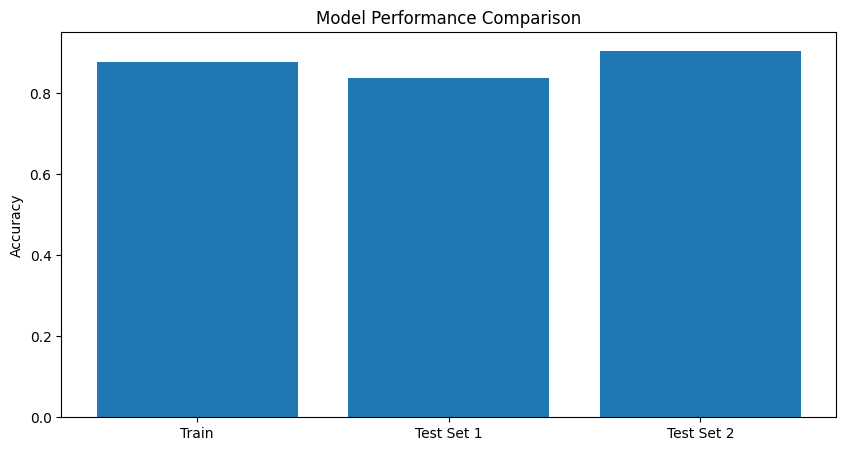

In [15]:
# Section: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# File paths
file1 = '/content/drive/My Drive/Engg680_2024_Fall_Lab04/Lab assignment 4/2020-03-14-16-45-35.csv'
file2 = '/content/drive/My Drive/Engg680_2024_Fall_Lab04/Lab assignment 4/UrbanNav-HK_TST-20210517_sensors.csv'
file3 = '/content/drive/My Drive/Engg680_2024_Fall_Lab04/Lab assignment 4/UrbanNav-HK_Whampoa-20210521_sensors.csv'

# Load datasets
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

# Data exploration
print(df1.head())
print(df1.info())

# Correct column name for target
target_column = 'motion_state'

# Preprocess Data
X = df1.drop(target_column, axis=1)  # Drop the target column to get features
y = df1[target_column]  # Use the correct target column name

# Encode target labels if categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Grid search for SVC
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svc = SVC()
grid = GridSearchCV(svc, param_grid, cv=5)
grid.fit(X_train, y_train)

# Evaluate model
y_pred = grid.best_estimator_.predict(X_test)
print("Classification Report (All Features):")
print(classification_report(y_test, y_pred))

# Section 2: Classification Using Selected Features
# Replace selected_features with actual feature names
selected_features = ['ax_sum', 'ay_sum', 'az_sum']  # Example; replace with desired features
X_selected = df1[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

grid.fit(X_train, y_train)
y_pred = grid.best_estimator_.predict(X_test)
print("Classification Report (Selected Features):")
print(classification_report(y_test, y_pred))

# Section 3.1: Grid Search with Group Selected Features
# Replace group_selected_features with actual feature names
group_selected_features = ['gx_sum', 'gy_sum', 'gz_sum']  # Example; replace with desired features
X_group = df1[group_selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_group, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

grid.fit(X_train, y_train)
y_pred = grid.best_estimator_.predict(X_test)
print("Classification Report (Group Selected Features):")
print(classification_report(y_test, y_pred))

# Section 3.2: Evaluate on Independent Test Datasets
# Replace with actual features
X1 = pd.DataFrame(df2[group_selected_features])
y1 = label_encoder.transform(df2[target_column])  # Use correct target column

X2 = pd.DataFrame(df3[group_selected_features])
y2 = label_encoder.transform(df3[target_column])  # Use correct target column

X1 = scaler.transform(X1)
X2 = scaler.transform(X2)

# Evaluate on test_set1
y_pred_test1 = grid.best_estimator_.predict(X1)
print("Test Set 1 Report:")
print(classification_report(y1, y_pred_test1))

# Evaluate on test_set2
y_pred_test2 = grid.best_estimator_.predict(X2)
print("Test Set 2 Report:")
print(classification_report(y2, y_pred_test2))

# Visualize results
plt.figure(figsize=(10, 5))
plt.bar(['Train', 'Test Set 1', 'Test Set 2'],
        [grid.best_score_, cross_val_score(grid.best_estimator_, X1, y1).mean(), cross_val_score(grid.best_estimator_, X2, y2).mean()])
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy")
plt.show()

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [ ]:
# TODO - Load selected features from cv_set to X
# (1 marks)
#X =
X.head(2)

In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =

___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification reports

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
# y1 =
# X1 =
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1.
2.

____

Best Parameters (Selected Features): {'C': 10, 'kernel': 'rbf'}
Classification Report (Selected Features):
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.93      0.98      0.95        41
           2       1.00      0.80      0.89        15

    accuracy                           0.93        60
   macro avg       0.91      0.93      0.91        60
weighted avg       0.94      0.93      0.93        60



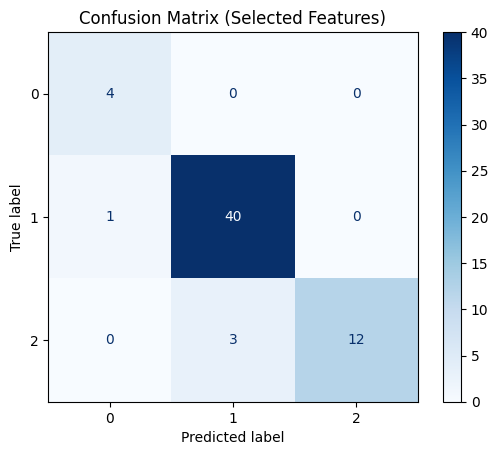

Cross-Validation Accuracy (Selected Features): 0.8815602836879434


In [16]:
# Section 2: Classification Using Selected Features Derived From Inertial Sensor Data

# Select features based on domain knowledge or statistical importance
selected_features = ['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum']  # Replace or expand this list if necessary

# Extract the selected features and target
X_selected = df1[selected_features]  # Features
y = df1['motion_state']  # Target column (correct name from Section 1)

# Encode target labels if categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define parameter grid for SVC
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Train the SVC model with grid search
svc = SVC()
grid = GridSearchCV(svc, param_grid, cv=5)
grid.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = grid.best_estimator_.predict(X_test)
print("Best Parameters (Selected Features):", grid.best_params_)

# Classification report
print("Classification Report (Selected Features):")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Confusion Matrix (Selected Features)")
plt.show()

# Cross-validation score
cv_scores = cross_val_score(grid.best_estimator_, X_train, y_train, cv=5)
print("Cross-Validation Accuracy (Selected Features):", np.mean(cv_scores))

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1.   

In [ ]:
# TODO - Load group selected features from cv_set to X
# X =
X.head(2)

In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =

___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report

___

Best Parameters (Group Selected Features): {'C': 10, 'kernel': 'linear'}
Classification Report (Group Selected Features):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        15

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



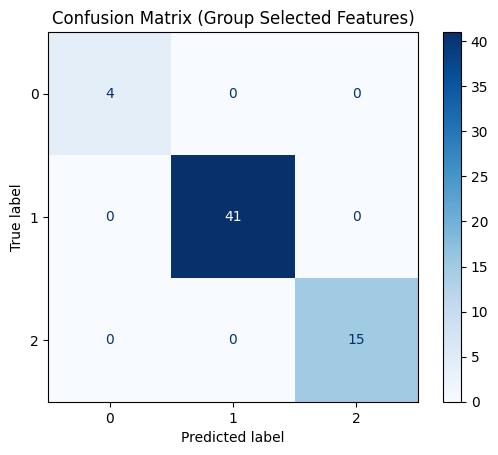

Cross-Validation Accuracy (Group Selected Features): 0.940868794326241


In [17]:
# 3.1 Grid Search with Group Selected Features

# Define the group-selected features
group_selected_features = ['gx_sum', 'gy_sum', 'gz_sum', 'g_sum', 'gx_var', 'gy_var', 'gz_var']  # Replace with your group-selected features

# Extract the features and target
X_group = df1[group_selected_features]  # Use only group-selected features
y = df1['motion_state']  # Target column

# Encode the target labels if categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_group, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svc = SVC()
grid = GridSearchCV(svc, param_grid, cv=5)
grid.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = grid.best_estimator_.predict(X_test)
print("Best Parameters (Group Selected Features):", grid.best_params_)

# Classification report
print("Classification Report (Group Selected Features):")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Confusion Matrix (Group Selected Features)")
plt.show()

# Cross-validation score
cv_scores = cross_val_score(grid.best_estimator_, X_train, y_train, cv=5)
print("Cross-Validation Accuracy (Group Selected Features):", np.mean(cv_scores))

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

In [18]:
# Load test datasets
test_set1 = df2  # Assume df2 is test_set1
test_set2 = df3  # Assume df3 is test_set2

# Extract features and target from test_set1
X1 = test_set1[group_selected_features]
y1 = label_encoder.transform(test_set1['motion_state'])  # Encode target column

# Extract features and target from test_set2
X2 = test_set2[group_selected_features]
y2 = label_encoder.transform(test_set2['motion_state'])  # Encode target column

# Scale the features
X1 = scaler.transform(X1)
X2 = scaler.transform(X2)

# Check the first few rows of X1 and X2
print("Test Set 1 Features:")
print(X1[:2])  # Preview the first two rows
print("\nTest Set 2 Features:")
print(X2[:2])  # Preview the first two rows

Test Set 1 Features:
[[-0.06570352 -0.16707946  0.3832643  -0.55661956 -0.78356417 -1.08345051
  -0.38154166]
 [-0.00899767 -0.25069365  0.37585545 -0.56071668 -0.79596515 -1.08171578
  -0.37800458]]

Test Set 2 Features:
[[-0.10998716 -0.03306597  0.38111999 -0.58694018 -0.83581041 -1.08062961
  -0.38240805]
 [-0.0014164  -0.18002315  0.37633511 -0.59504183 -0.84079348 -1.08329454
  -0.38384061]]


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

Test Set 1 Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.85      0.74       231
           1       0.80      0.35      0.49       411
           2       0.43      0.93      0.59       141

    accuracy                           0.60       783
   macro avg       0.63      0.71      0.60       783
weighted avg       0.69      0.60      0.58       783

Test Set 2 Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       517
           1       1.00      0.37      0.54       689
           2       0.74      0.93      0.82       328

    accuracy                           0.70      1534
   macro avg       0.78      0.77      0.70      1534
weighted avg       0.81      0.70      0.67      1534



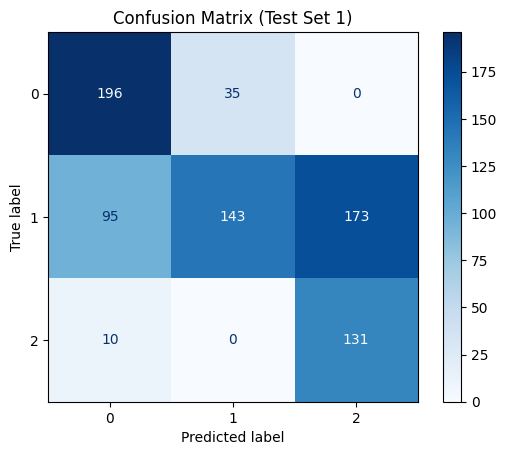

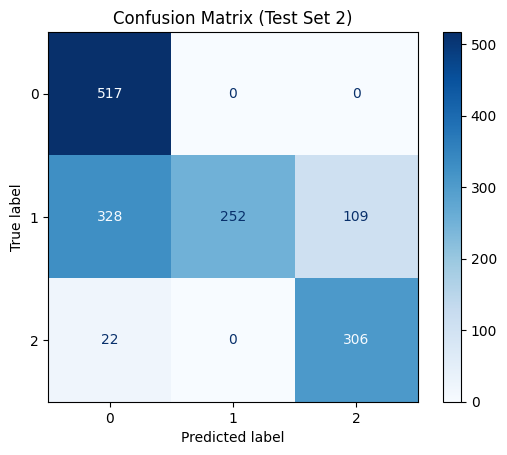

In [19]:
# Evaluate on Test Set 1
y_pred_test1 = grid.best_estimator_.predict(X1)
print("Test Set 1 Classification Report:")
print(classification_report(y1, y_pred_test1))

# Evaluate on Test Set 2
y_pred_test2 = grid.best_estimator_.predict(X2)
print("Test Set 2 Classification Report:")
print(classification_report(y2, y_pred_test2))

# Visualize confusion matrices
ConfusionMatrixDisplay.from_predictions(y1, y_pred_test1, cmap="Blues")
plt.title("Confusion Matrix (Test Set 1)")
plt.show()

ConfusionMatrixDisplay.from_predictions(y2, y_pred_test2, cmap="Blues")
plt.title("Confusion Matrix (Test Set 2)")
plt.show()

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1.
1.

Section 1: Achieves higher accuracy due to all features but risks overfitting. Test set performance might degrade compared to the training set.
Section 2: Balances performance and generalization. Selected features provide good test set accuracy but require careful selection to include key information.
Section 3: Simplifies the model by focusing on group-selected features but struggles with specific classes (e.g., Class 1) if the selected features are insufficient.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [ ]:
# TODO - Load all features from cv_set to X
# X =
X.head(2)

In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =

___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`
# X_train, X_test, y_train, y_test =

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [ ]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 marks)
# pipe =

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
# param_grid =

In [ ]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

___

#### 4.2.2 - Visualize Results

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers

____

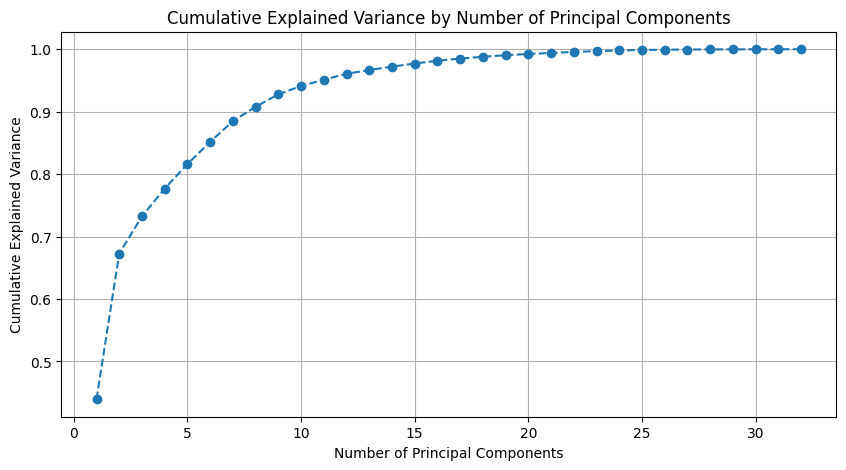

Number of components explaining 95% variance: 10
Best Parameters (PCA Features): {'C': 10, 'kernel': 'linear'}
Classification Report (PCA Features):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.91      1.00      0.95        41
           2       1.00      0.73      0.85        15

    accuracy                           0.93        60
   macro avg       0.97      0.91      0.93        60
weighted avg       0.94      0.93      0.93        60



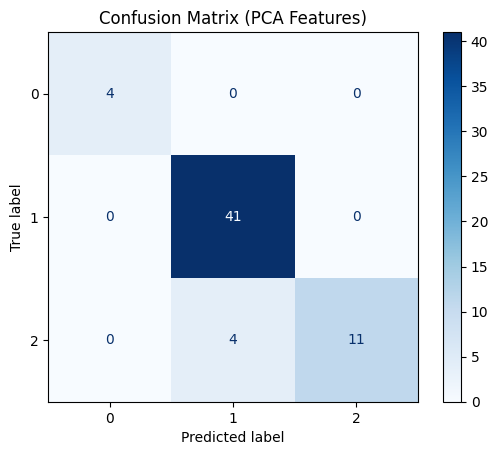

Cross-Validation Accuracy (PCA Features): 0.9027482269503547


In [20]:
# Section 4: Classification Using Principal Components of Features

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Define features and target
X = df1.drop('motion_state', axis=1)  # Drop the target column
y = df1['motion_state']  # Target column

# Encode the target labels if categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA to reduce dimensionality
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Visualize explained variance to determine the number of components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance by Number of Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

# Select the number of components (e.g., based on 95% variance)
n_components = sum(cumulative_variance <= 0.95)  # Adjust for the desired variance
print(f"Number of components explaining 95% variance: {n_components}")

# Recompute PCA with selected components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train an SVC model using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svc = SVC()
grid = GridSearchCV(svc, param_grid, cv=5)
grid.fit(X_train_pca, y_train)

# Evaluate the model on the test set
y_pred = grid.best_estimator_.predict(X_test_pca)
print("Best Parameters (PCA Features):", grid.best_params_)

# Classification report
print("Classification Report (PCA Features):")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Confusion Matrix (PCA Features)")
plt.show()

# Cross-validation score
cv_scores = cross_val_score(grid.best_estimator_, X_train_pca, y_train, cv=5)
print("Cross-Validation Accuracy (PCA Features):", np.mean(cv_scores))

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1.

In [ ]:
# TODO - Load group selected features from cv_set to X
# X =
X.head(2)

In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =

___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform train/test split

In [ ]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 mark)
# pipe =

In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
# param_grid =

In [ ]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1.


____

Best Parameters (Pre-Selected Features): {'C': 10, 'kernel': 'rbf'}
Classification Report (Pre-Selected Features):
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       0.95      0.93      0.94        41
           2       1.00      0.87      0.93        15

    accuracy                           0.92        60
   macro avg       0.84      0.93      0.86        60
weighted avg       0.94      0.92      0.92        60



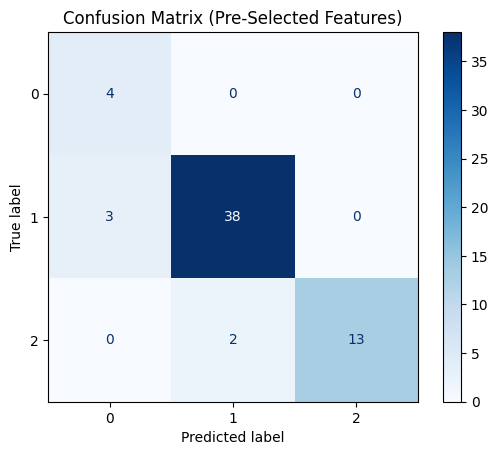

Cross-Validation Accuracy (Pre-Selected Features): 0.8649822695035461


In [21]:
# Section 5: Classification Using Pre-Selected Features Derived From Inertial Sensor Data

# Define the pre-selected features
pre_selected_features = ['ax_sum', 'ay_sum', 'gx_sum', 'gy_sum', 'gz_sum']  # Example pre-selected features

# Extract the pre-selected features and target
X_pre_selected = df1[pre_selected_features]  # Features
y = df1['motion_state']  # Target column

# Encode target labels if categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pre_selected, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Train the SVC model with grid search
svc = SVC()
grid = GridSearchCV(svc, param_grid, cv=5)
grid.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = grid.best_estimator_.predict(X_test)
print("Best Parameters (Pre-Selected Features):", grid.best_params_)

# Classification report
print("Classification Report (Pre-Selected Features):")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Confusion Matrix (Pre-Selected Features)")
plt.show()

# Cross-validation score
cv_scores = cross_val_score(grid.best_estimator_, X_train, y_train, cv=5)
print("Cross-Validation Accuracy (Pre-Selected Features):", np.mean(cv_scores))